# Medical Imaging
## 2021-2022

### Lab 4
João Félix Pimenta | Maja Milekic | Miguel Joaquim Roque Fernandes

Consider the study of a sample with T1/T2 = 1400 ms /90 ms by 1H-NMR in a 3T static magnetic
field, using the rotating reference frame and assuming on-resonance spins. Consider the
equilibrium magnetization vector M0 = [0; 0; 1] and simulate the evolution of the magnetization
vector (displaying the time course of each of its components) using a time step of 0.05 ms in the
following conditions:
1. Excitation (ignoring relaxation) by a 90º flip angle B1 pulse along -y with duration 5 ms.
2. Relaxation following the 90º excitation simulated in 1., for an observation period of 790 ms. Try also an observation period of 3000 ms.
3. Repeat 1. 2. for the flip angles 45º and 180º.
4. Now repeat 3. for a flip angle of 45º, over 10 consecutive cycles of excitation and relaxation (repetition time (TR) = 790 ms).

In [27]:
#imports
import matplotlib.pyplot as plt
import numpy as np

#define the constants
# the gyromagnetic constant gamma for 1H is 42.58 MHz/Tesla
gamma = 42.58 #MHz/Tesla
deltat= 0.05 #ms
T1 = 1400 #ms
T2 = 90 #ms
M0 = np.array([0, 0, 1])


#define the bloch equations
#that calculate the evolution of the magnetization vector
def bloch(M_initial, duration, angle=90):
    _theta = angle/(duration/deltat)/180*np.pi
    _M = [M_initial]
    time = np.arange(0, duration, deltat) #time elapsed in ms
    
    for t in time[1:]:
        a = [[np.cos(_theta), 0, np.sin(_theta)],
             [0, 1, 0],
             [-np.sin(_theta), 0, np.cos(_theta)]]
        _M.append(np.dot(a, _M[-1]))
    return _M

def blochrelax(M_initial, duration, includelast=False):
    _M = [M_initial]
    time = np.arange(0, duration, deltat) #time elapsed in ms
    if not includelast: time = time[1:]
    for t in time:
        a = [[np.exp(- deltat / T2), 0, 0],
             [0, np.exp(- deltat / T2), 0],
             [0, 0, np.exp(- deltat / T1)]]
        _M.append(np.add(np.dot(a, _M[-1]), [0, 0, M0[2] * (1 - np.exp(- deltat / T1))]))
    if includelast: _M = _M[1:]
    return _M

# define the function
def plotM(_M, duration=5, title="Magnetization along x, y and z axis and M magnitude"): # plot the values
    time = np.arange(0, duration, deltat) #time elapsed in ms
    fig, ax = plt.subplots()
    fig.suptitle(title)
    ax.plot(time, [row[0] for row in _M], "-r", label="Mx")
    ax.plot(time, [row[1] for row in _M], "-g", label="My")
    ax.plot(time, [row[2] for row in _M], "-b", label="Mz")
    plt.xlabel('Time (s)')
    plt.ylabel('Magnetization')
    leg = ax.legend();
    plt.show()

Exercise 1


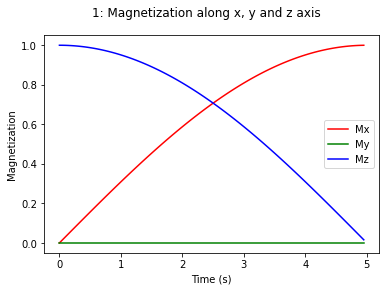

Exercise 2


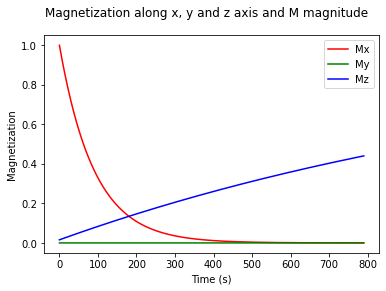

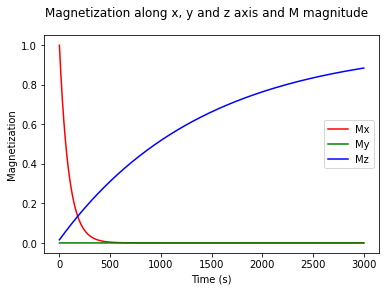

Exercise 3


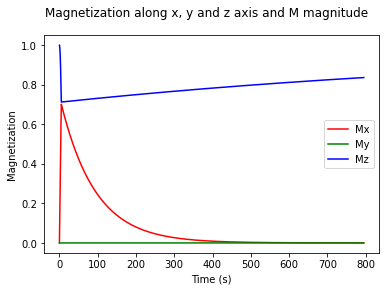

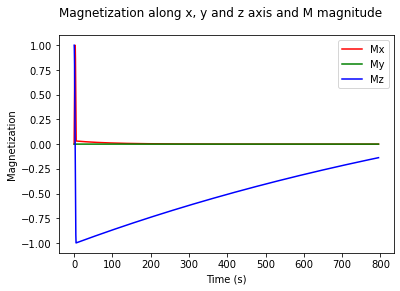

Exercise 4


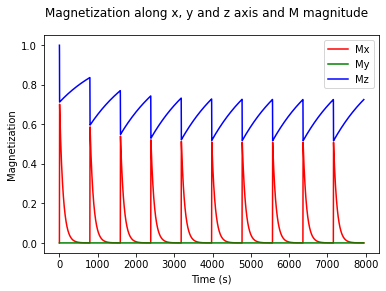

In [28]:
print("Exercise 1")
M_E1 = bloch(M0, duration=5, angle=90)
plotM(M_E1, duration=5, title='1: Magnetization along x, y and z axis')

print("Exercise 2")
M_E2 = blochrelax(M_E1[-1], duration=790)
plotM(M_E2, duration=790)

M_E2 = blochrelax(M_E1[-1], duration=3000)
plotM(M_E2, duration=3000)

print("Exercise 3")
M_E3 = bloch(M0, duration=5, angle=45)
M_E3 += blochrelax(M_E3[-1], duration=790)
plotM(M_E3, duration=795)

M_E3 = bloch(M0, duration=5, angle=180)
M_E3 += blochrelax(M_E3[-1], duration=790)
plotM(M_E3, duration=795)

print("Exercise 4")
M_E4 = [M0]
M_E4 = bloch(M_E4[-1], duration=5, angle=45)
M_E4 += blochrelax(M_E4[-1], duration=790)
for cycle in range(9):
    M_E4 += bloch(M_E4[-1], duration=5, angle=45)
    M_E4 += blochrelax(M_E4[-1], duration=790)

plotM(M_E4, duration=7950)